In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from datetime import datetime

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

# Creating a time series DataFrame

In [ ]:
df = pd.read_csv('Monthly_Transportation_Statistics.csv', index_col=0, parse_dates=True)
df["Date"] = pd.to_datetime(df['Date'], yearfirst=False, format='%m/%d/%Y 12:00:00 AM')

# change the index to the date
df = df.set_index("Date")

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

refer to this link for the Columns in this Dataset
https://data.bts.gov/Research-and-Statistics/Monthly-Transportation-Statistics/crem-w557

In [ ]:
df

,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,Freight Rail Intermodal Units,...,U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight,Year,Month,Weekday Name
Date,,,,,,,,,,,,,,,,,,,,,
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947,1,Wednesday
1947-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947,2,Saturday
1947-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947,3,Saturday
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947,4,Tuesday
1947-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947,5,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,41.0,NaN,NaN,68120000.0,7180000.0,60940000.0,10409279.0,219227237.0,207716648.0,1224780.0,...,7100000.0,2686000.0,59520000.0,NaN,NaN,0.8,NaN,2021,12,Wednesday
2022-01-01,7.0,NaN,NaN,NaN,NaN,NaN,9025016.0,196098728.0,170595808.0,1001443.0,...,NaN,3059000.0,NaN,1.137067e+11,5.693538e+10,NaN,5.677131e+10,2022,1,Saturday
2022-02-01,24.0,NaN,NaN,NaN,NaN,NaN,9670860.0,207313017.0,198943286.0,1030317.0,...,NaN,2918000.0,NaN,1.124586e+11,5.625152e+10,NaN,5.620709e+10,2022,2,Tuesday


# Years Between 2019 and 2022

In [ ]:
df_between_2019_2022 = df.query("Date >= '01-01-2019' \
                       and Date < '04-01-2022'")

In [ ]:
sns.set(rc={'figure.figsize':(15, 5)})

Text(0.5, 1.0, 'Government Construction Spending- Educational from 2019 to 2022')

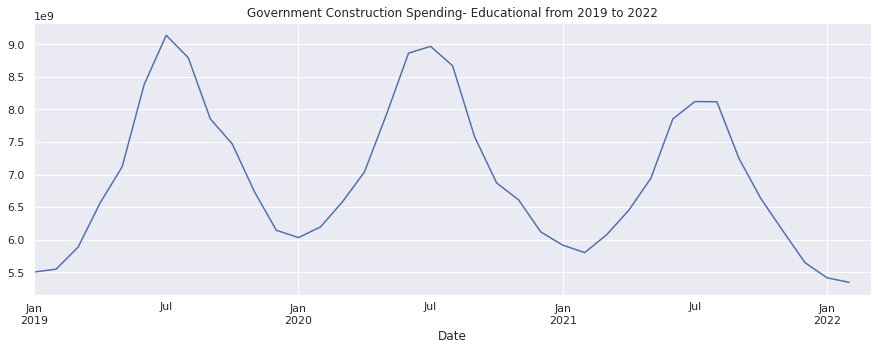

In [ ]:
df_between_2019_2022['State and Local Government Construction Spending - Educational'].plot()
plt.title("Government Construction Spending- Educational from 2019 to 2022")

Text(0.5, 1.0, 'The Mean Of Construction Government Spending - Education By Month from 2019 - 2022')

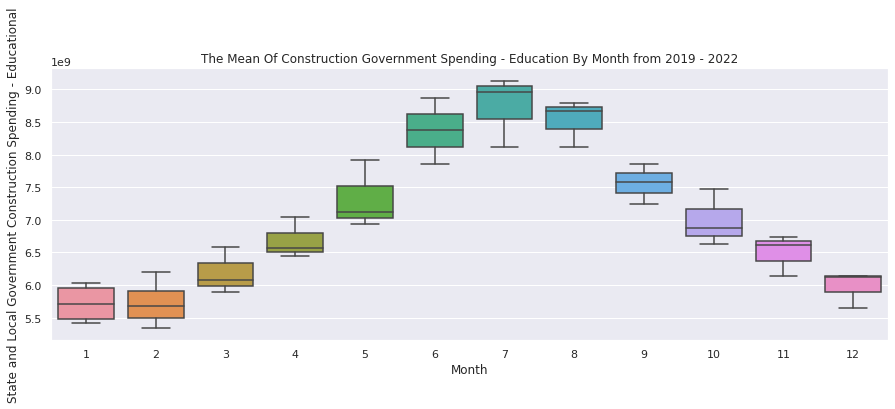

In [ ]:
sns.boxplot(data=df_between_2019_2022, x='Month', y='State and Local Government Construction Spending - Educational');
plt.title("The Mean Of Construction Government Spending - Education By Month from 2019 - 2022")

# Years from 1993 to Present

In [ ]:
df_annual_spending = df[df["Year"]>=1993]['State and Local Government Construction Spending - Educational']

Text(0.5, 1.0, 'Government Construction Spending- Educational from 1993 - Present')

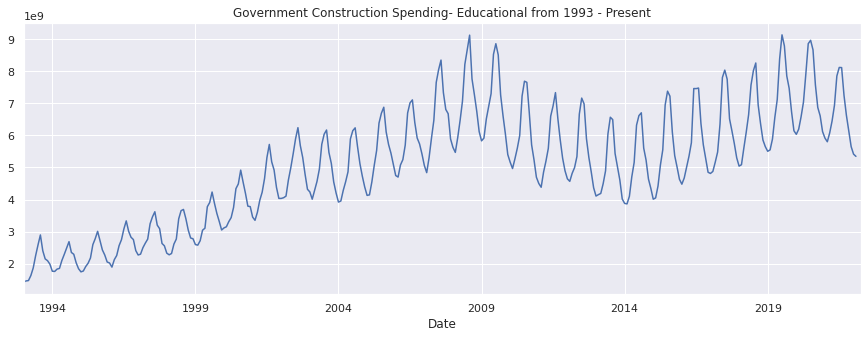

In [ ]:
sns.set(rc={'figure.figsize':(15, 5)})
df_annual_spending.plot()
plt.title("Government Construction Spending- Educational from 1993 - Present")

Text(0.5, 1.0, 'The Mean Of Construction Government Spending - Education By Month from 1993 - Present')

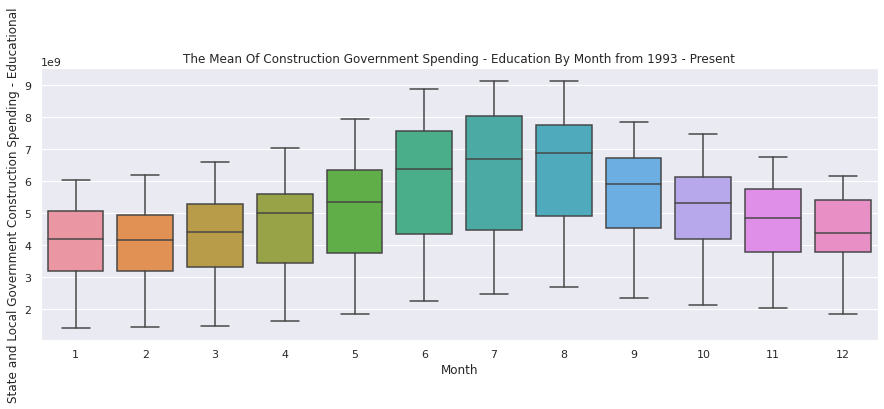

In [ ]:
columns = ['State and Local Government Construction Spending - Educational', "Month"]
df_annual_spending = df[df["Year"]>=1993][columns]
sns.boxplot(data=df_annual_spending, x='Month', y='State and Local Government Construction Spending - Educational');
plt.title("The Mean Of Construction Government Spending - Education By Month from 1993 - Present")

# Let's take a look at air traffic (For Question 1)

In [ ]:
air_traffic = "U.S. Airline Traffic - Total - Non Seasonally Adjusted"

<AxesSubplot:xlabel='Date'>

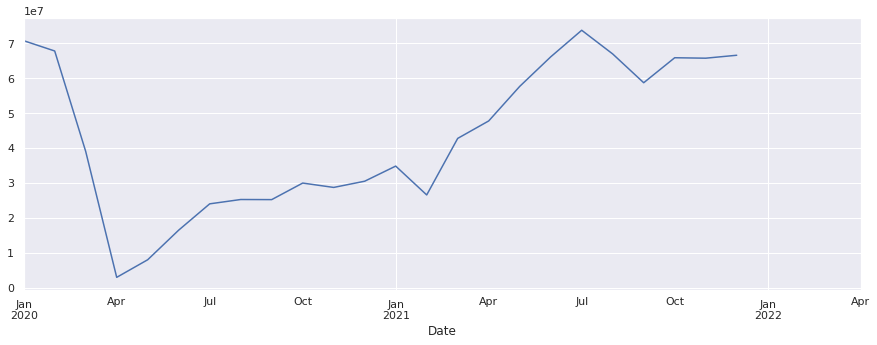

In [ ]:
df[df["Year"] > 2019][air_traffic].plot()

"""
https://www.faa.gov/newsroom/novel-coronavirus-covid-19-update-0

4/22/2020 explains why there is a drop in airline traffic in apri of 2020

To ensure the continued resiliency of the air traffic control system amid the COVID-19 pandemic, the FAA is planning to temporarily adjust the operating hours of approximately 100 control towers nationwide. Making these adjustments allows for continued safe operations throughout the national airspace system while minimizing health risks to our workforce.

These facilities have seen a significant reduction in flights, especially during the evening and nighttime hours, since the pandemic began. Adjusting the operating hours will further protect our employees and reduce the possibility of temporary tower closures from COVID-19 exposures by ensuring enough controllers are available to staff the facilities during peak hours. It also will enable us to allocate difficult-to-source supplies where they are most needed.

Most of the towers are historically closed at night, during which time the radar facility with oversight assumes the airspace. The FAA expects the adjustments will not have any operational effects. The agency plans to begin adjusting facility hours later this month.

The FAA will continue to monitor traffic volume at all of these facilities and may make future adjustments to operating hours as appropriate.

The FAA previously took steps to limit the spread of COVID-19 in air traffic control facilities by establishing separate teams of controllers that stay together throughout the duty week.
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b973bf52-720f-4f08-a354-6907a41c78da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>